This notebook contains results analysis for Roman Pogodin's bachelor thesis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

%matplotlib inline

# Rank analysis
This part is to analyse differences in rank of solutions (sdp vs. solution) and imporvements in cut mean/variance

## Max cut

In [38]:
def plot_rank_difference(results_sdp, results_relaxed, method, problem='maxcut', is_save=True):
    sns.set(font_scale=2.5)
    fig, axes = plt.subplots(ncols=4, figsize=(16, 6))

    ranks = results_sdp['rank4'] - results_relaxed['rank4']
    n_bins = np.max(ranks) - np.min(ranks) + 1
    axes[0].hist(ranks, bins=n_bins, rwidth=0.9)
    axes[0].set_xlabel('rank, low tol')
    axes[0].set_ylabel('number of graphs')
    
    ranks = results_sdp['rank6'] - results_relaxed['rank6']
    n_bins = np.max(ranks) - np.min(ranks) + 1
    axes[1].hist(ranks, bins=n_bins, rwidth=0.9)
    axes[1].set_xlabel('rank, high tol')
    
    means = results_sdp['cut_mean'] - results_relaxed['cut_mean']
    axes[2].hist(means, rwidth=0.9)
    axes[2].set_xlabel('mean cut')
    
    stds = results_sdp['cut_std'] - results_relaxed['cut_std']
    axes[3].hist(stds, rwidth=0.9)
    axes[3].set_xlabel('cut std')

    if is_save:
        plt.savefig('./rank_plots/rank_' + problem + \
                    '_' + method + '.eps', format='eps', dpi=1000)

In [139]:
folder = './rank_cut_no_schatten/rank_cut_results_maxcut/'
col_names = ['rank4', 'rank6', 'cut_mean', 'cut_std']

results_sdp = pd.read_csv(folder + 'sdp_s50_pr50', names=col_names)
results_logdet = pd.read_csv(folder + 'logdet_s50_pr50', names=col_names)
results_singval = pd.read_csv(folder + 'singval_s50_pr50_q8', names=col_names)

folder = './rank_cut_schatten/rank_cut_results_maxcut/'  # these results were obtained later
results_sdp2 = pd.read_csv(folder + 'sdp_s50_pr50', names=col_names)
results_grad = pd.read_csv(folder + 'grad_s50_pr50_p0', names=col_names)
results_irls = pd.read_csv(folder + 'irls_s50_pr50_p0', names=col_names)

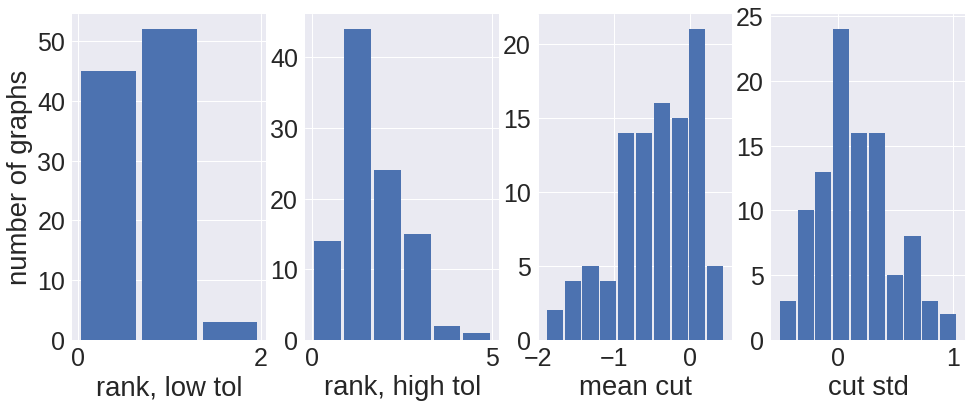

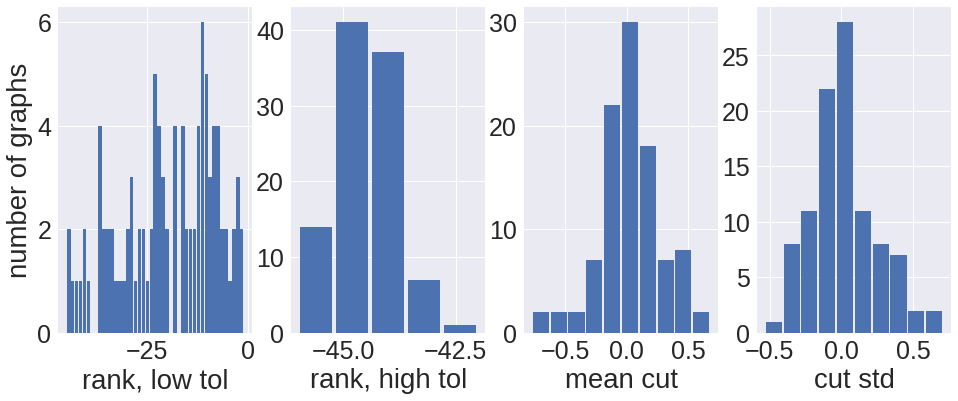

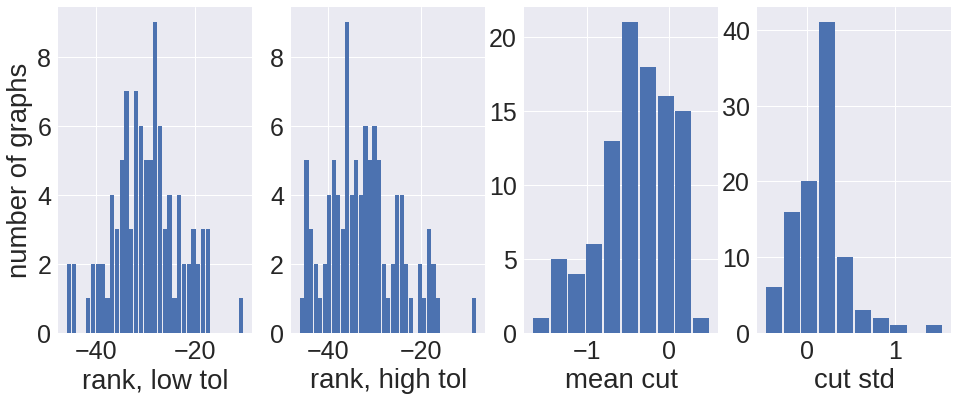

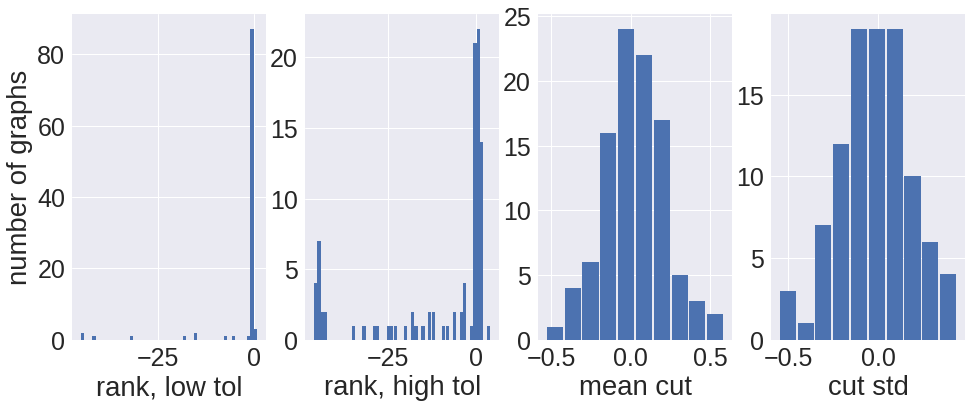

In [140]:
plot_rank_difference(results_sdp, results_logdet, 'logdet_50')
plot_rank_difference(results_sdp2, results_grad, 'grad_50')
plot_rank_difference(results_sdp2, results_irls, 'irls_50')
plot_rank_difference(results_sdp, results_singval, 'singval_50')

## PSD cases

In [141]:
folder = './rank_cut_no_schatten/rank_cut_results_psd/'
col_names = ['rank4', 'rank6', 'cut_mean', 'cut_std']

results_sdp = pd.read_csv(folder + 'sdp_s50_pr50', names=col_names)
results_logdet = pd.read_csv(folder + 'logdet_s50_pr50', names=col_names)
results_singval = pd.read_csv(folder + 'singval_s50_pr50_q8', names=col_names)

folder = './rank_cut_schatten/rank_cut_results_psd/'
results_sdp2 = pd.read_csv(folder + 'sdp_s50_pr50', names=col_names)
results_grad = pd.read_csv(folder + 'grad_s50_pr50_p0', names=col_names)
results_irls = pd.read_csv(folder + 'irls_s50_pr50_p0', names=col_names)

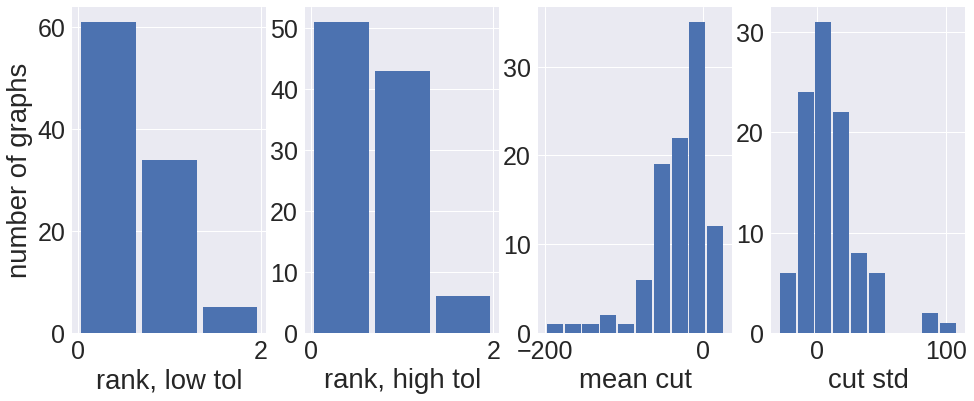

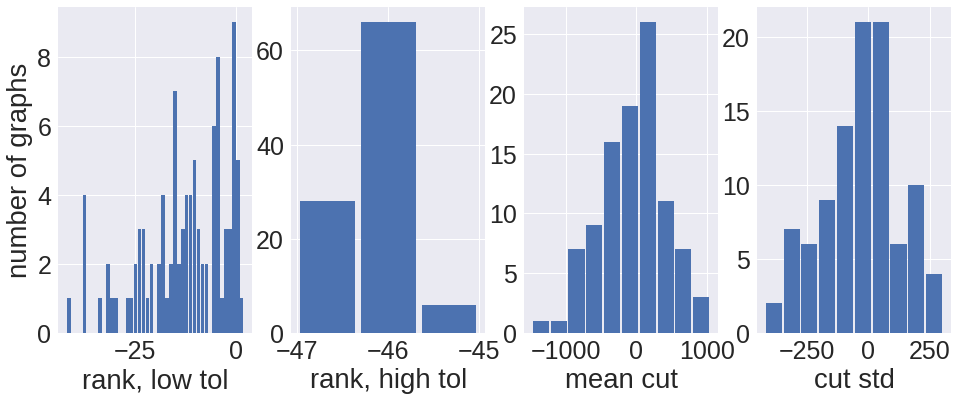

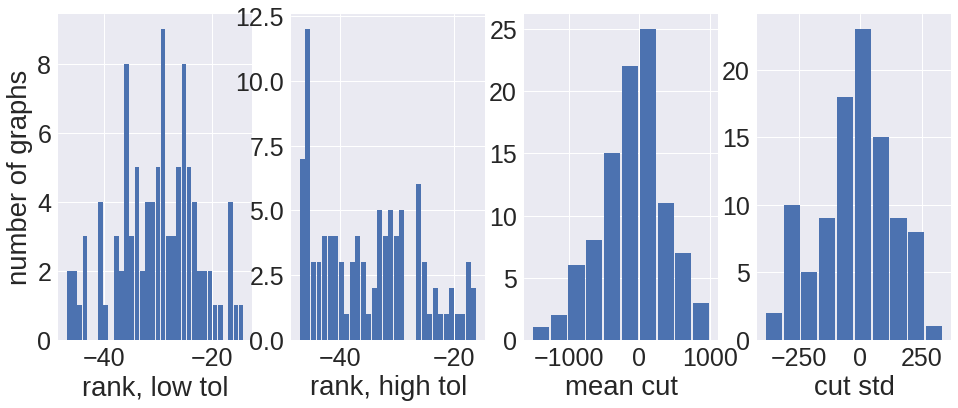

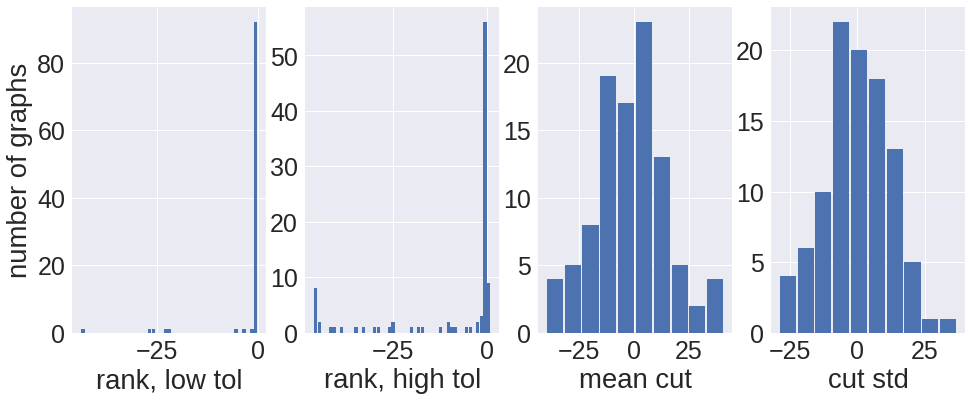

In [142]:
plot_rank_difference(results_sdp, results_logdet, 'logdet_50', 'psd')
plot_rank_difference(results_sdp, results_grad, 'grad_50', 'psd')
plot_rank_difference(results_sdp, results_irls, 'irls_50', 'psd')
plot_rank_difference(results_sdp, results_singval, 'singval_50', 'psd')

# Cut value distribution for max cut

In [54]:
cut_distr_res = pd.read_csv('./cut_res_logdet_irls_s50_p50.csv')
means = np.mean(cut_distr_res)
print('Mean:')
print(means)
print('STD:')
print(np.std(cut_distr_res))

Mean:
SDP       363.8294
LogDet    364.9844
IRLS      363.8583
dtype: float64
STD:
SDP       5.684936
LogDet    5.391397
IRLS      5.629478
dtype: float64


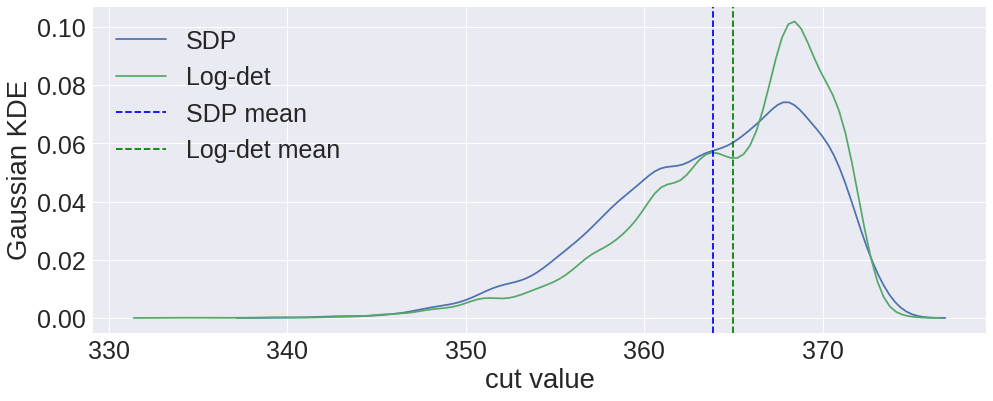

In [55]:
sns.set(font_scale=2.5)
fig, axes = plt.subplots(figsize=(16, 6))
sns.distplot(cut_distr_res['SDP'].values, ax=axes, hist=False, kde=True, label='SDP', bins=40,
             hist_kws={'rwidth' : 0.9})
sns.distplot(cut_distr_res['LogDet'].values, ax=axes, hist=False, kde=True, label='Log-det', bins=40,
             hist_kws={'rwidth' : 0.9})

axes.axvline(x=means[0], color='b', linestyle='--', label='SDP mean')
axes.axvline(x=means[1], color='g', linestyle='--', label='Log-det mean')

plt.xlabel('cut value')
plt.ylabel('Gaussian KDE')
# plt.title('Log-Det cut improvement for n=50 and p=0.5')

plt.legend()
# plt.show()
plt.savefig('./rank_plots/cut_impr_s50_p50.eps', format='eps', dpi=1000)

# Cut value for psd objective matrix

In [56]:
cut_distr_res = pd.read_csv('./psd_s50.csv')
means = np.mean(cut_distr_res)
print('Mean:')
print(means)
print('STD:')
print(np.std(cut_distr_res))

Mean:
SDP       27435.016428
LogDet    27761.456064
dtype: float64
STD:
SDP       1238.128952
LogDet    1027.181769
dtype: float64


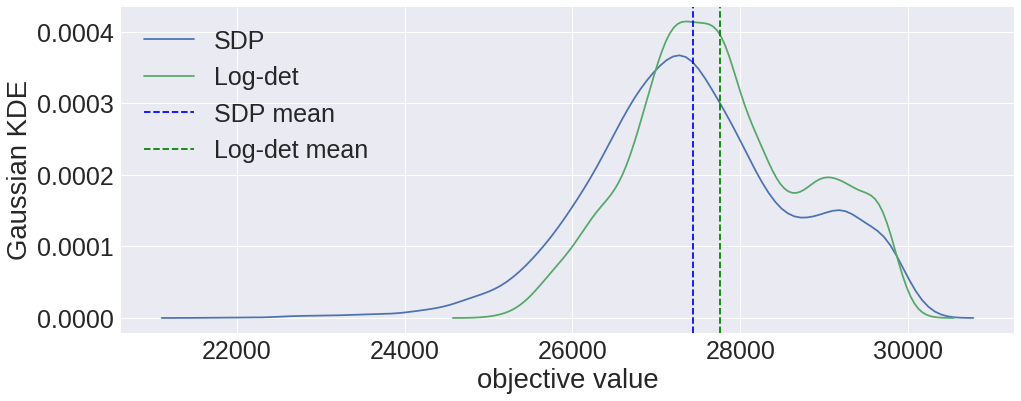

In [58]:
sns.set(font_scale=2.5)
fig, axes = plt.subplots(figsize=(16, 6))
sns.distplot(cut_distr_res['SDP'].values, ax=axes, hist=False, kde=True, label='SDP', bins=40,
             hist_kws={'rwidth' : 0.9})
sns.distplot(cut_distr_res['LogDet'].values, ax=axes, hist=False, kde=True, label='Log-det', bins=30,
             hist_kws={'rwidth' : 0.9})
# sns.distplot(cut_distr_res['IRLS'].values, ax=axes, hist=False, label='IRLS')

axes.axvline(x=means[0], color='b', linestyle='--', label='SDP mean')
axes.axvline(x=means[1], color='g', linestyle='--', label='Log-det mean')
# axes[2].axvline(x=means[2], color='r', linestyle='--')

plt.xlabel('objective value')
plt.ylabel('Gaussian KDE')
# plt.title('Log-Det improvement for n=50 in PSD case')

plt.legend()
# plt.show()
plt.savefig('./rank_plots/cut_impr_psd_s50.eps', format='eps', dpi=1000)

# Gset test
Graphs from https://web.stanford.edu/%7Eyyye/yyye/Gset/

Singval was chosen due to memory limits of logdet

In [136]:
col_names = ['rank4', 'rank6', 'max_cut', 'cut_mean', 'cut_std']
sdp_data = pd.DataFrame(columns=col_names)
singval_data = pd.DataFrame(columns=col_names)

n_graphs = 21

for i in range(n_graphs):
    sdp_data = pd.concat((sdp_data, pd.read_csv('./gset_results/sdp_gset' + str(i + 1), \
                                                names=col_names)))
    singval_data = pd.concat((singval_data, \
                              pd.read_csv('./gset_results/singval_q80_gset' + str(i + 1), \
                                          names=col_names)))
    
sdp_data.set_index(np.arange(1, n_graphs + 1), inplace=True)
singval_data.set_index(np.arange(1, n_graphs + 1), inplace=True)

sdp_data.drop(['cut_mean', 'cut_std'], axis=1, inplace=True)
singval_data.drop(['cut_mean', 'cut_std'], axis=1, inplace=True)

sdp_data = sdp_data.add_prefix('sdp_')
singval_data = singval_data.add_prefix('singval_')
data = pd.concat((sdp_data, singval_data), axis=1)

In [137]:
data

,sdp_rank4,sdp_rank6,sdp_max_cut,singval_rank4,singval_rank6,singval_max_cut
1,13,16,11438,13,13,11443
2,13,16,11414,13,13,11441
3,14,15,11446,14,320,11443
4,14,25,11486,14,14,11452
5,12,16,11440,12,12,11450
6,13,14,1982,13,13,1997
7,13,19,1826,12,69,1817
8,12,13,1850,12,12,1821
9,12,14,1870,12,12,1855
10,12,14,1823,12,12,1806


In [138]:
f = open('./gset_table.txt', 'w')
f.write(data.to_latex())
f.close()